# Gaussian Transform to Support Spatial Modeling
 Prof. Michael Pyrcz

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats, random
%matplotlib inline

The Gaussian distribution is powerful.  With very few parameters (mean, standard deviation and covariance matrix) we can completely characterize full multivariate distributions.  We can easily calculate conditional expectations and homoscedastic, conditional variances given any conditioning constraints.  This is critical for kriging-based, sequential simulation, just one of various methods available to simulate continuous random functions with the multivariate Gaussian distribution.  There is no practical alternative in many cases, but our data is not generally Gaussian distributed; therefore, we need to transform our data to Gaussian with a quantile-to-quantile normal scores transform.  This is how we do it.

1. Compile the available data.  Treat outliers, decluster and debias. If declustering weights are available add weights to the percentile calculation.
2. Sort data, use the n+1 percentile calculation that assume tails (minimum and maximum) are not sampled.  Assign minimum and maximum values. Also calculate the associated Standard Normal, N[0,1], percentile values using the Norm.Inv() function.  
3. Plot the Vsh CDF from Table 2.
4. Plot the N[Vsh] CDF from Table 2.
5. Graphically observe the transform of a single value in the table, y = GY-1FZ(z).
6. Compare results to Percentile.EXC Excel function that also uses a N+1 basis, but without explicit tail assignment (Error if outside data range).
7. Plot the Q-Q plot to observe directly the Vsh - N[Vsh] transform function.

### Table 1. Available representative data: samples in depth

In [2]:
# Borehole depth
depth = (100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
          115, 116, 117, 118, 119)
# fraction of clay
clay = [26.205, 16.729, 25.138, 26.705, 30.129, 31.560, 30.069, 17.762, 38.283, 36.320, 
        43.246, 42.959, 34.622, 21.505, 43.114, 37.014, 33.395, 23.199, 27.595, 37.434]
sclay = clay.copy()
sclay.sort()
print('min sclay ', min(sclay), '| ', sclay[0])
print('max sclay ', max(sclay), '| ', sclay[-1])

min sclay  16.729 |  16.729
max sclay  43.246 |  43.246


#### Table 2 2. Source CDF and Transformed, N[VsH]
By N+1 Percentile Method

In [3]:
# index
index = [i for i in range(1, len(depth)+1, 1)]
# percentile
n = len(index) + 1
percentile = [i/n for i in index]
percentile= np.round(percentile, 2).tolist()

In [4]:
# add tails 
ind = [0,] + index + [len(index)+1,]
perc = [0.01,] + percentile + [0.99,]
clay2 = [15.,] + sclay + [45.,]
# Percent point function (inverse of cdf — percentiles).
N_0_1 = stats.norm.ppf(perc, loc=0, scale=1)

In [5]:
len(clay2)

22

In [6]:
df = pd.DataFrame({'index': ind, 'Percentiles': perc, 'Per clay': clay2, 'N[0,1]': N_0_1})
df

,index,Percentiles,Per clay,"N[0,1]"
0,0,0.01,15.000,-2.326348
1,1,0.05,16.729,-1.644854
2,2,0.10,17.762,-1.281552
3,3,0.14,21.505,-1.080319
4,4,0.19,23.199,-0.877896
5,5,0.24,25.138,-0.706303
6,6,0.29,26.205,-0.553385
7,7,0.33,26.705,-0.439913
8,8,0.38,27.595,-0.305481
9,9,0.43,30.069,-0.176374


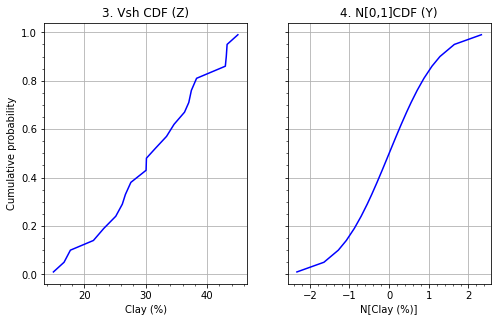

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.8), sharey=True)
ax1.plot(df['Per clay'], df['Percentiles'], color='blue')
ax1.set_title('3. Vsh CDF (Z)')
ax1.set_ylabel('Cumulative probability')
ax1.set_xlabel('Clay (%)')
ax1.yaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.grid()

ax2.plot(df['N[0,1]'], df['Percentiles'], color='blue')
ax2.set_title('4. N[0,1]CDF (Y)')
ax2.set_xlabel('N[Clay (%)]')
ax2.yaxis.get_ticklocs(minor=True)
ax2.minorticks_on()
ax2.grid()

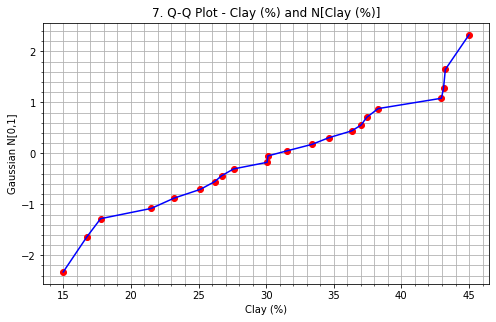

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4.8))
ax1.plot(df['Per clay'], df['N[0,1]'], 'o', color='red')
ax1.plot(df['Per clay'], df['N[0,1]'], color='blue')
ax1.set_title('7. Q-Q Plot - Clay (%) and N[Clay (%)]')
ax1.set_ylabel('Gaussian N[0,1]')
ax1.set_xlabel('Clay (%)')
ax1.yaxis.get_ticklocs(minor=True)
ax1.minorticks_on()
ax1.grid(which='both')